<a href="https://colab.research.google.com/github/Oscar270292/ML_DL_tool_box/blob/main/Model_Tool_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
📦 Model_Tool_Box: Modular and Extensible ML/DL Model Framework

`Model_Tool_Box` is a unified framework for building, training, comparing, and managing common ML/DL models such as Linear Regression, LSTM, RNN, GRU, RandomForest, and GradientBoosting. Core features include:

- 🧱 Unified `BaseModel` class with standardized `.fit()`, `.predict()`, `.evaluate()` interface
- 💾 Built-in `.save()` / `.load()` for model serialization
- 📉 `.plot_training_loss()` for easy visualization
- ⚙️ Configuration via YAML or Python `dict`
- 🏭 `ModelFactory` for dynamic model instantiation by name + hyperparameters
- 🧠 Compatible with both `scikit-learn` and `PyTorch`
- 🔧 Clean file structure for easy extension
```



# **Base Model**

In [ ]:
from abc import ABC, abstractmethod
import joblib
import os
import matplotlib.pyplot as plt

class BaseModel(ABC):
    def __init__(self):
        self.train_losses = []

    @abstractmethod
    def fit(self, X_train, y_train, **kwargs):
        pass

    @abstractmethod
    def predict(self, X_test):
        pass

    @abstractmethod
    def evaluate(self, X_test, y_test):
        pass

    def save(self, filepath):
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        joblib.dump(self, filepath)
        print(f"[Model Saved] {filepath}")

    @classmethod
    def load(cls, filepath):
        model = joblib.load(filepath)
        print(f"[Model Loaded] {filepath}")
        return model

    def plot_training_loss(self):
        if not self.train_losses:
            print("No training losses recorded.")
            return
        plt.plot(self.train_losses)
        plt.title("Training Loss Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class LinearRegressionModel(BaseModel):
    def __init__(self):
        super().__init__()
        self.model = LinearRegression()

    def fit(self, X_train, y_train, **kwargs):
        self.model.fit(X_train, y_train)
        # sklearn 沒有 epoch，所以手動記錄一次 loss
        y_pred = self.model.predict(X_train)
        loss = mean_squared_error(y_train, y_pred)
        self.train_losses.append(loss)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return mean_squared_error(y_test, y_pred)


# **RandomForestModel**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

class RandomForestModel(BaseModel):
    def __init__(self, n_estimators=100, max_depth=None):
        super().__init__()
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

    def fit(self, X_train, y_train, **kwargs):
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_train)
        loss = mean_squared_error(y_train, y_pred)
        self.train_losses.append(loss)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return mean_squared_error(y_test, y_pred)


# **GradientBoostingModel**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

class GradientBoostingModel(BaseModel):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        super().__init__()
        self.model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    def fit(self, X_train, y_train, **kwargs):
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_train)
        loss = mean_squared_error(y_train, y_pred)
        self.train_losses.append(loss)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return mean_squared_error(y_test, y_pred)


# **RNN**


In [ ]:
import torch
import torch.nn as nn

class RNNModel(BaseModel):
    def __init__(self, input_size, hidden_size, num_layers=1, output_size=1):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.loss_fn = nn.MSELoss()
        self.optimizer = None

    def fit(self, X_train, y_train, epochs=10, lr=0.001):
        self.optimizer = torch.optim.Adam(list(self.rnn.parameters()) + list(self.fc.parameters()), lr=lr)
        for epoch in range(epochs):
            self.rnn.train()
            output, _ = self.rnn(X_train)
            pred = self.fc(output[:, -1, :])
            loss = self.loss_fn(pred, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.train_losses.append(loss.item())

    def predict(self, X_test):
        self.rnn.eval()
        with torch.no_grad():
            output, _ = self.rnn(X_test)
            pred = self.fc(output[:, -1, :])
        return pred

    def evaluate(self, X_test, y_test):
        pred = self.predict(X_test)
        return self.loss_fn(pred, y_test).item()


# **GRU**

In [ ]:
class GRUModel(BaseModel):
    def __init__(self, input_size, hidden_size, num_layers=1, output_size=1):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.loss_fn = nn.MSELoss()
        self.optimizer = None

    def fit(self, X_train, y_train, epochs=10, lr=0.001):
        self.optimizer = torch.optim.Adam(list(self.gru.parameters()) + list(self.fc.parameters()), lr=lr)
        for epoch in range(epochs):
            self.gru.train()
            output, _ = self.gru(X_train)
            pred = self.fc(output[:, -1, :])
            loss = self.loss_fn(pred, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.train_losses.append(loss.item())

    def predict(self, X_test):
        self.gru.eval()
        with torch.no_grad():
            output, _ = self.gru(X_test)
            pred = self.fc(output[:, -1, :])
        return pred

    def evaluate(self, X_test, y_test):
        pred = self.predict(X_test)
        return self.loss_fn(pred, y_test).item()


# **LSTM**

In [ ]:
import torch
import torch.nn as nn

class LSTMModel(BaseModel):
    def __init__(self, input_size, hidden_size, num_layers=1, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.loss_fn = nn.MSELoss()
        self.optimizer = None

    def fit(self, X_train, y_train, epochs=10, lr=0.001):
        self.optimizer = torch.optim.Adam(list(self.lstm.parameters()) + list(self.fc.parameters()), lr=lr)
        for epoch in range(epochs):
            self.lstm.train()
            output, _ = self.lstm(X_train)
            pred = self.fc(output[:, -1, :])
            loss = self.loss_fn(pred, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.train_losses.append(loss.item())

    def predict(self, X_test):
        self.lstm.eval()
        with torch.no_grad():
            output, _ = self.lstm(X_test)
            pred = self.fc(output[:, -1, :])
        return pred

    def evaluate(self, X_test, y_test):
        pred = self.predict(X_test)
        return self.loss_fn(pred, y_test).item()


# **Config**

In [ ]:
# Jupyter Notebook 裡的 Cell
model_config = {
    "LinearRegressionModel": {
        "module": "__main__",
        "class": "LinearRegressionModel"
    },
    "LSTMModel": {
        "module": "__main__",
        "class": "LSTMModel",
        "input_size": 10,
        "hidden_size": 32,
        "num_layers": 2,
        "output_size": 1
    },
    "RandomForestModel": {
        "module": "__main__",
        "class": "RandomForestModel",
        "n_estimators": 100
    },
    "GradientBoostingModel": {
        "module": "__main__",
        "class": "GradientBoostingModel",
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3
    },
    "RNNModel": {
        "module": "__main__",
        "class": "RNNModel",
        "input_size": 10,
        "hidden_size": 32,
        "num_layers": 1,
        "output_size": 1
    },
    "GRUModel": {
        "module": "__main__",
        "class": "GRUModel",
        "input_size": 10,
        "hidden_size": 32,
        "num_layers": 1,
        "output_size": 1
    }
}


# **Factory**

In [ ]:
import importlib

class ModelFactory:
    def __init__(self, config_dict):
        self.config = config_dict

    def create(self, model_name):
        if model_name not in self.config:
            raise ValueError(f"{model_name} not found in config.")

        conf = self.config[model_name]
        module = importlib.import_module(conf['module'])  # 如果是 package，要加上 Model_Tool_Box.xxx
        class_ = getattr(module, conf['class'])

        params = {k: v for k, v in conf.items() if k not in ['module', 'class']}
        return class_(**params)


In [ ]:
# ML Model Example
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入並標準化資料
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用 ModelFactory 建立並訓練模型
factory = ModelFactory(model_config)
# model = factory.create("LinearRegressionModel")
# model = factory.create("RandomForestModel")
model = factory.create("GradientBoostingModel")
model.fit(X_train, y_train)

mse = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse:.2f}")


Test MSE: 2919.95


Test Loss: 24487.4609375


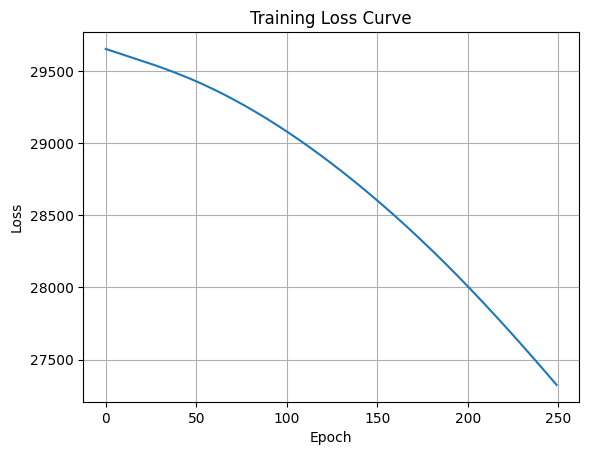

In [ ]:
# NN model Example
import torch

# 假設只有一個時間步（seq_len=1）
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # shape: (batch, 1, features)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # shape: (batch, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

factory = ModelFactory(model_config)
model = factory.create("LSTMModel")
model = factory.create("GRUModel")
model = factory.create("RNNModel")
model.fit(X_train_tensor, y_train_tensor, epochs=250, lr=0.001)
print("Test Loss:", model.evaluate(X_test_tensor, y_test_tensor))
model.plot_training_loss()
